In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Esto descarga y carga los datos del dataset fetch_lfw_people, el min_faces_per_person=60 indica que solo se tomaran los que tengan almenos 60 fotografías, imprimiendo la lista de los nombres y las dimensiones de las fotografías.

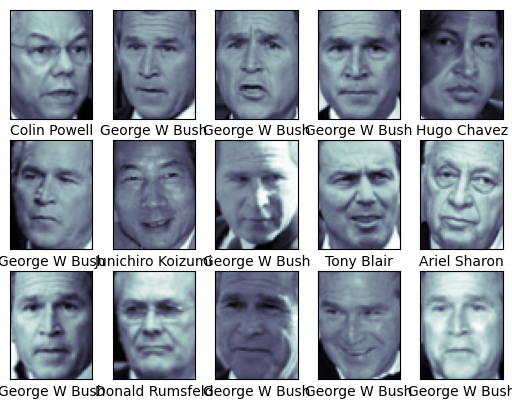

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

Primero importa la librería de matplotlib, después con %matplotlib inline hace que las imágenes se muestren en una cuadrícula de 15 espacios, 4 columnas y 3 filas. Además, coloca el nombre de la persona en la imagén que corresponde.

In [111]:

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Crea un modelo para reconocimiento facial reduciendo las dimensiones con pca y utilizando el clasificador svc, usando kernel para separar. También creamos un pipeline para encadenar los procesos de oca y svc 

In [114]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

En esta celda se importa la funcion train_test_split para después entrenar los datos y poder modelarlo, separando las variables en train y test.

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 4min 20s
Wall time: 1min 7s
{'svc__C': 5, 'svc__gamma': 0.001}


Esta celda realiza una busqueda mediante hiperparámetros, para encontrar el mejor modelo svc dentro del pipeline que ya tenemos. Con el 'svc__C' controla la penalización,  y 'svc__gamma' controla la influencia de cada punto de entrenamiento.

In [119]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Con este código tomamos el mejor modelo que encontramos y predecimos yfit que son las caras en el conjunto de prueba, que no se vieron en el entrenamiento.

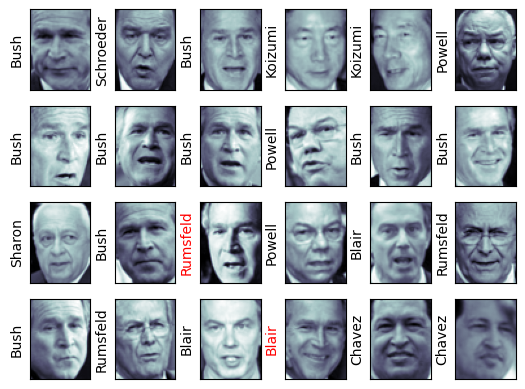

In [121]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
plt.show()

Visualiza algunas de las predicciones del modelo, diciendonos cuales son los correctos o no, dependiendo del color.

In [123]:

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Evalua el desempeño del modelo usando métricas estandar de clasificación.

In [125]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

<Axes: >

Esta celda crea una matriz de confusión para ver como el modelo clasifica y ver donde se equivoca.

In [134]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix


faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data        # imágenes aplanadas
y = faces.target      # etiquetas numéricas
target_names = faces.target_names

print("Clases:", target_names)
print("Shape de las imágenes:", faces.images.shape)





Clases: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
Shape de las imágenes: (1348, 62, 47)


In [136]:

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)  # puede tardar varios minutos

print("Mejores parámetros:", grid.best_params_)

CPU times: total: 4min 23s
Wall time: 1min 7s
Mejores parámetros: {'svc__C': 5, 'svc__gamma': 0.001}


In [148]:

model = grid.best_estimator_
yfit = model.predict(Xtest)


print(classification_report(ytest, yfit, target_names=target_names))



                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



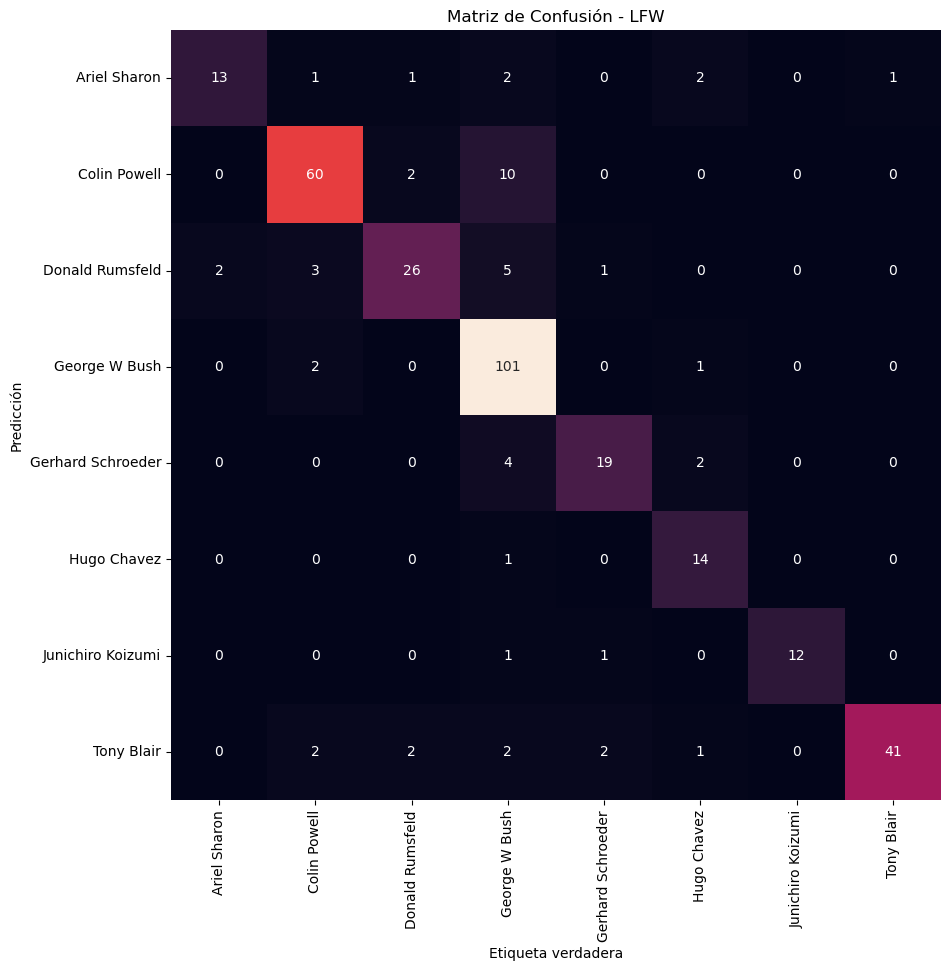

In [150]:

mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(12,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Etiqueta verdadera')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión - LFW')
plt.show()



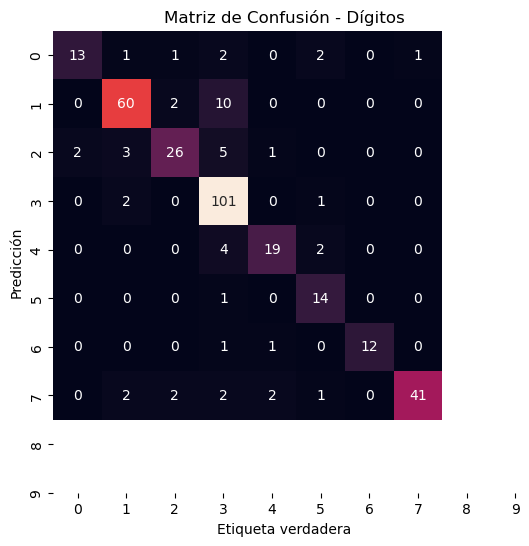

In [146]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calcular matriz de confusión
mat = confusion_matrix(ytest, yfit)

# Visualizar con heatmap
plt.figure(figsize=(8,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Etiqueta verdadera')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión - Dígitos')
plt.show()


Scikit-learn. (2025). sklearn.decomposition.PCA — Principal Component Analysis (PCA). Scikit-learn documentation. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Scikit-learn. (2025). sklearn.metrics.classification_report & confusion_matrix. Scikit-learn documentation. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Scikit-learn. (2025). sklearn.model_selection.GridSearchCV — Exhaustive search over specified parameter values for an estimator. Scikit-learn documentation. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Scikit-learn. (2025). sklearn.svm.SVC — Support Vector Classification. Scikit-learn documentation. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html